In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import cv2
import glob
import os.path
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import *
from keras.layers import *
import keras.backend as K
from keras.callbacks import *
from keras.optimizers import *
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.applications.xception import Xception
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['557_left.jpeg', '22_right.jpeg', '1192_right.jpeg', '1178_right.jpeg', '100_left.jpeg', '51_right.jpeg', '13_right.jpeg', '733_right.jpeg', '690_left.jpeg', '694_left.jpeg', '1073_left.jpeg', '904_right.jpeg', '1021_right.jpeg', '1008_left.jpeg', '1180_right.jpeg', '330_right.jpeg', '21_right.jpeg', '1002_left.jpeg', '1136_right.jpeg', '838_left.jpeg', '740_left.jpeg', '1052_left.jpeg', '169_left.jpeg', '510_left.jpeg', '33_left.jpeg', '343_right.jpeg', '367_right.jpeg', '36_left.jpeg', '1100_left.jpeg', '384_left.jpeg', '279_left.jpeg', '16_right.jpeg', '670_right.jpeg', '1211_right.jpeg', '294_right.jpeg', '1142_left.jpeg', '997_right.jpeg', '866_left.jpeg', '389_right.jpeg', '70_right.jpeg', '803_right.jpeg', '337_right.jpeg', '1088_left.jpeg', '650_right.jpeg', '210_right.jpeg', '508_right.jpeg', '58_right.jpeg', '825_left.jpeg', '439_right.jpeg', '367_left.jpeg', '1107_right.jpeg', '943_left.jpeg', '288_right.jpeg', '650_left.jpeg', '1034_left.jpeg', '731_right.jpeg', '980_right

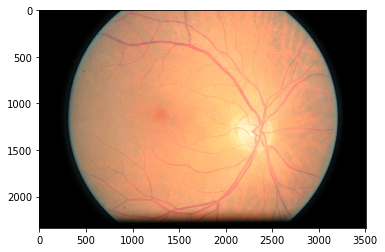

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../input/386_left.jpeg")
plt.imshow(img)

In [4]:
filelist = glob.glob('../input/*.jpeg') 
csv = pd.read_csv("../input/trainLabels.csv")
np.size(filelist)
x = []
y = []
for file in filelist:
    img = cv2.resize( cv2.imread(file, cv2.IMREAD_COLOR), (299, 299))
    x.append(np.array(img))
    f = file
    f = f.replace("../input/","")
    f = f.replace(".jpeg","")
    y.append( csv.loc[ csv.image == f, 'level'].values[0] )
    


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.33, random_state=42)

In [6]:
x_train = np.array(list(x_train))
y_train = np.array(list(y_train))
x_test = np.array(list(x_test))
y_test = np.array(list(y_test))
x_train =x_train // 255
x_test = x_test // 255

In [7]:
csv.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [8]:
Y_train = to_categorical(y_train, 5)
Y_test = to_categorical(y_test, 5)


In [9]:
model =Xception(include_top=True, weights=None, input_tensor=None, input_shape=(299, 299, 3), pooling=None, classes=5)


model.summary()
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [10]:
model.fit(x_train, Y_train, validation_data=(x_test,Y_test), batch_size = 16, epochs=40
          , shuffle=True, verbose=2)


Train on 670 samples, validate on 330 samples
Epoch 1/40
 - 29s - loss: 0.3120 - acc: 0.8878 - val_loss: 0.3504 - val_acc: 0.8885
Epoch 2/40
 - 19s - loss: 0.2859 - acc: 0.8970 - val_loss: 0.3709 - val_acc: 0.8885
Epoch 3/40
 - 19s - loss: 0.2644 - acc: 0.9024 - val_loss: 0.3780 - val_acc: 0.8533
Epoch 4/40
 - 19s - loss: 0.2140 - acc: 0.9209 - val_loss: 0.4720 - val_acc: 0.8867
Epoch 5/40
 - 19s - loss: 0.1914 - acc: 0.9293 - val_loss: 0.6029 - val_acc: 0.8885
Epoch 6/40
 - 19s - loss: 0.1761 - acc: 0.9376 - val_loss: 0.3979 - val_acc: 0.8739
Epoch 7/40
 - 19s - loss: 0.1724 - acc: 0.9397 - val_loss: 0.5704 - val_acc: 0.8703
Epoch 8/40
 - 19s - loss: 0.1482 - acc: 0.9466 - val_loss: 0.6324 - val_acc: 0.8873
Epoch 9/40
 - 19s - loss: 0.1385 - acc: 0.9490 - val_loss: 0.4987 - val_acc: 0.8788
Epoch 10/40
 - 19s - loss: 0.1443 - acc: 0.9481 - val_loss: 0.6265 - val_acc: 0.8861
Epoch 11/40
 - 19s - loss: 0.1283 - acc: 0.9555 - val_loss: 0.5332 - val_acc: 0.8515
Epoch 12/40
 - 19s - loss: 0

In [11]:
def predict(test_num):
    pre = model.predict(x_test)[test_num]
    index_ = np.argmax( pre )
    categories = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
    return categories[index_]
    

In [12]:
predict(40)

'No DR'